In [1]:
import math 
import cv2 
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
print("Successfully library installed")

Successfully library installed


1) INTIALIZING THE POSE DETECTION MODEL

In [2]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode =True, min_detection_confidence =0.3, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

2) READING THE IMAGE

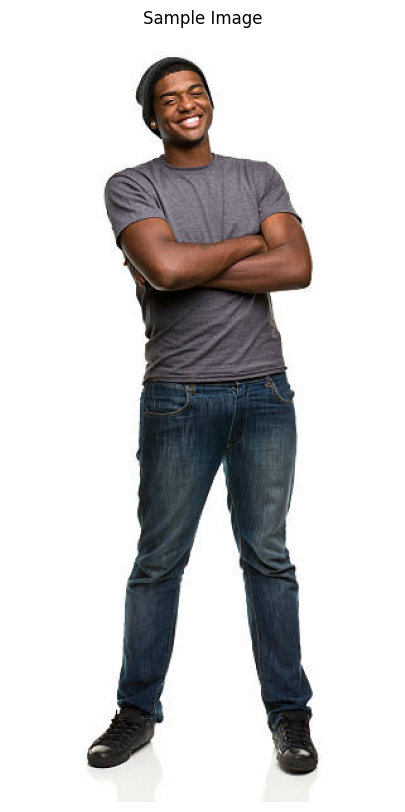

In [3]:
sample_img = cv2.imread('Media/sample.jpg')

plt.figure(figsize=[10,10])
plt.title("Sample Image");plt.axis("off");plt.imshow(sample_img[:,:,::-1]);plt.show()

3) PERFORMING POSE DETECTION 

In [4]:
result = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))  # Convert to RGB

if result.pose_landmarks:
    for i in range(2): 
        landmark = mp_pose.PoseLandmark(i)
        landmark_data = result.pose_landmarks.landmark[landmark.value]
        print(f'{landmark.name}: {landmark_data}')

NOSE: x: 0.455749154
y: 0.09916991
z: -0.385700792
visibility: 0.991759717

LEFT_EYE_INNER: x: 0.469747812
y: 0.0824107826
z: -0.317934632
visibility: 0.983681202



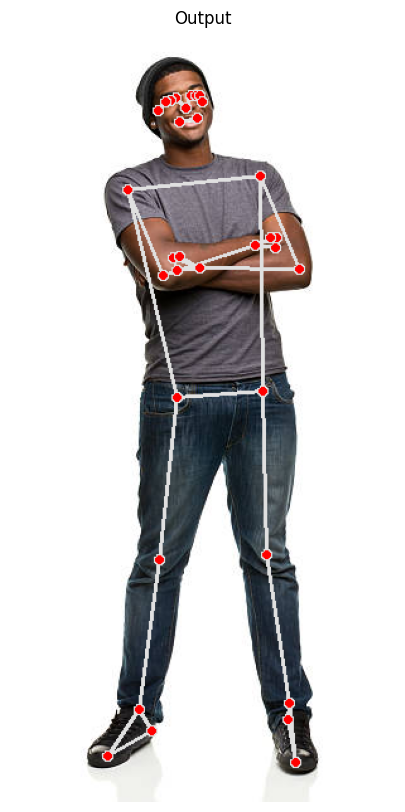

In [5]:
img_copy = sample_img.copy()
if result.pose_landmarks:
    mp_drawing.draw_landmarks(
        image=img_copy,
        landmark_list=result.pose_landmarks,
        connections=mp_pose.POSE_CONNECTIONS
    )
    
    # Display the output
    fig = plt.figure(figsize=[10, 10])
    plt.title("Output")
    plt.axis('off')
    plt.imshow(img_copy[:, :, ::-1])  # Convert BGR to RGB for Matplotlib
    plt.show()

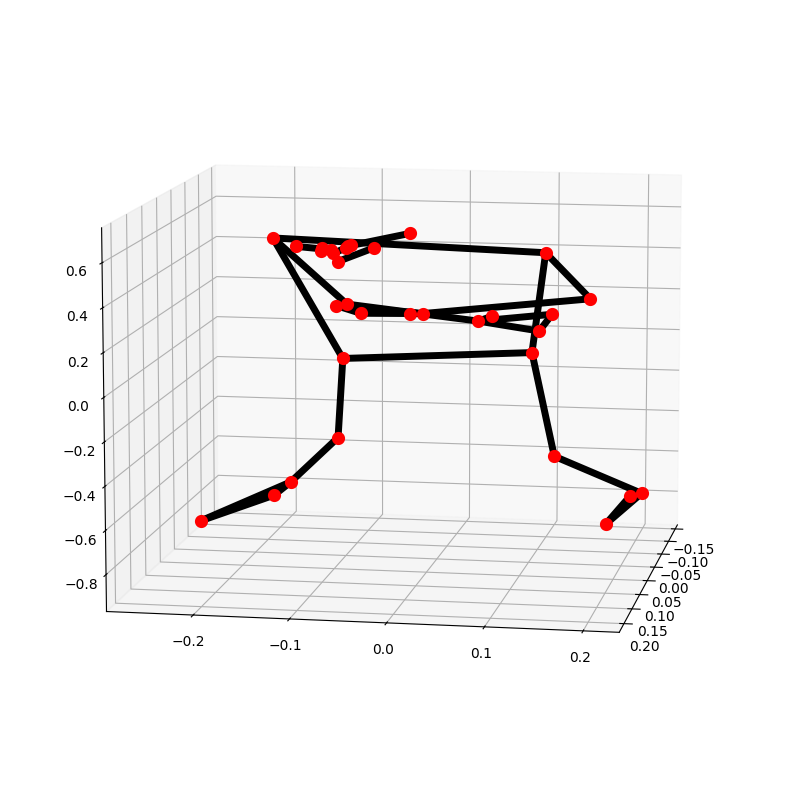

In [6]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()
mp_drawing.plot_landmarks(
    result.pose_world_landmarks, 
    mp_pose.POSE_CONNECTIONS)

In [7]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Assuming mp_drawing and mp_pose have already been defined as:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def detectPose(image, pose, display=True):
    # Create a copy of the image
    output_image = image.copy()
    # Convert the image to RGB
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Process the image with pose detection
    results = pose.process(imageRGB)
    
    # Get the height and width of the image
    height, width, _ = image.shape
    landmarks = []

    # If pose landmarks are found
    if results.pose_landmarks:
        # Draw the pose landmarks on the output image
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
        
        # Append the landmarks' coordinates to the list
        for landmark in results.pose_landmarks.landmark:
            landmarks.append(
                (int(landmark.x * width), int(landmark.y * height), landmark.z * width)
            )
    
    if display:
        # Display the original input image and the resultant image
        plt.figure(figsize=[22, 22])
        
        plt.subplot(121)
        plt.imshow(image[:, :, ::-1])  # Convert BGR to RGB
        plt.title("Original Image")
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(output_image[:, :, ::-1])  # Convert BGR to RGB
        plt.title("Output Image")
        plt.axis('off')

        # Also plot the Pose landmarks in 3D
        if results.pose_world_landmarks:
            mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    else:
        # Return the output image and the found landmarks
        return output_image, landmarks


POSE DETECTION

In [8]:
import cv2
import mediapipe as mp
import time

# Setup Pose function for video
mp_pose = mp.solutions.pose
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam or video file
video = cv2.VideoCapture(0)  # Change the index to the video file path if needed

# Create named window for resizing purposes
cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)

# Initialize video size (optional)
video.set(3, 1280)  # Width
video.set(4, 960)   # Height

# Initialize a variable to store the time of the previous frame
time1 = 0

while video.isOpened():
    # Read a frame
    ok, frame = video.read()

    if not ok:
        break  # Break the loop if the frame is not read properly

    # Flip the frame horizontally for natural (selfie-view) visualization
    frame = cv2.flip(frame, 1)

    # Perform Pose landmark detection
    imageRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose_video.process(imageRGB)

    # Calculate FPS
    time2 = time.time()
    if time2 - time1 > 0:
        frames_per_second = 1.0 / (time2 - time1)
    else:
        frames_per_second = 0
    time1 = time2

    # Display FPS on the frame
    cv2.putText(frame, f'FPS: {int(frames_per_second)}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)

    # Draw landmarks and connections if pose landmarks are detected
    if results.pose_landmarks:
        mp.solutions.drawing_utils.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Display the frame
    cv2.imshow('Pose Detection', frame)

    # Wait until a key is pressed
    k = cv2.waitKey(1) & 0xFF

    # Check if 'ESC' key is pressed to break the loop
    if k == 27:
        break

# Release the VideoCapture object and close the windows
video.release()
cv2.destroyAllWindows()


In [9]:
import math

def calculate_angle(landmark1, landmark2, landmark3):
    """
    This function calculates the angle between three different landmarks.

    Args:
    landmark1: The first landmark containing the x, y, and z coordinates.
    landmark2: The second landmark containing the x, y, and z coordinates.
    landmark3: The third landmark containing the x, y, and z coordinates.

    Returns:
    angle: The calculated angle between the three landmarks.
    """

    # Get the required landmark coordinates
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))

    # Ensure the angle is between 0 and 360 degrees
    if angle < 0:
        angle += 360

    return angle


In [10]:
angle = calculate_angle((558, 326, 0), (642, 333, 0), (718, 321, 0))

# Display the calculated angle
print(f'The calculated angle is {angle} degrees')

The calculated angle is 166.26373169437744 degrees


In [13]:
def classify_pose(landmarks, output_image, display=False):
    """
    This function classifies yoga poses depending upon the angles of various body joints.
    
    Args:
    landmarks: A list of detected landmarks of the person whose pose needs to be classified.
    output_image: An image of the person with the detected pose landmarks drawn.
    display: A boolean value; if set to True, the function displays the resultant image.
    
    Returns:
    output_image: The image with the detected pose landmarks and pose label.
    label: The classified pose label.
    """
    # Initialize the label as 'Unknown Pose'
    label = 'Unknown Pose'

    # Specify color (Red) with which the label will be written
    color = (0, 0, 255)  # Red color

    # Calculate the required angles (shoulders, elbows, knees)
    left_elbow_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    right_elbow_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])
    
    left_shoulder_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                          landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    
    right_shoulder_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                           landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                           landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value])
    
    # Knee angles (for leg checking)
    left_knee_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    
    right_knee_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])

    # Warrior II Pose Classification
    if 165 < left_elbow_angle < 195 and 165 < right_elbow_angle < 195:
        if 80 < left_shoulder_angle < 110 and 80 < right_shoulder_angle < 110:
            if 90 < left_knee_angle < 120 and 90 < right_knee_angle < 120:
                label = 'Warrior II Pose'

    # Check if both legs are straight for T Pose
    if 160 < left_knee_angle < 195 and 160 < right_knee_angle < 195:
        label = 'T Pose'

    # Check if it is the Tree pose
    if (165 < left_knee_angle < 195 or 165 < right_knee_angle < 195):
        if (315 < left_knee_angle < 335 or 25 < right_knee_angle < 45):
            label = 'Tree Pose'

    # Check if the pose is classified successfully
    if label != 'Unknown Pose':
        # Update the color (to green) with which the label will be written on the image
        color = (0, 255, 0)
        
    # Write the label on the output image
    cv2.putText(output_image, label, (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)

    # Check if the resultant image is specified to be displayed
    if display:
        # Display the resultant image
        plt.figure(figsize=[10, 10])
        plt.imshow(output_image[:, :, ::-1])
        plt.title("Output Image")
        plt.axis("off")
        plt.show()

    # Return the output image and label regardless of display
    return output_image, label


In [14]:

pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the videoCapture object to read from the webcam
camera_video = cv2.VideoCapture(0)
camera_video.set(3, 1280)
camera_video.set(4, 960)

# Initialize a resizable window.
cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully
while camera_video.isOpened():

    # Read a frame
    ok, frame = camera_video.read()

    # Check if frame is not read properly
    if not ok:
        # Continue to the next iteration to read the next frame and ignore the empty camera frame
        continue

    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)

    # Get the width and height of the frame
    frame_height, frame_width, _ = frame.shape

    # Resize the frame while keeping the aspect ratio
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Detect Pose landmarks
    result,landmarks = detectPose(frame, pose_video, display=False)
    
        # Check if the Landmarks are detected
    if landmarks:
        frame, _ = classify_pose(landmarks, frame, display=False)

        # Display the frame
        cv2.imshow('Pose Classification', frame)

    # Wait until a key is pressed
    k = cv2.waitKey(1) & 0xFF

    # Check if 'ESC' is pressed.
    if k == 27:
        # Break the Loop
        break

# Release the Videocapture object and close the windows
camera_video.release()
cv2.destroyAllWindows()
